# **** Advanced House Price Prediction******

In [1]:
#importing packages
import pandas as pd # data preprocessing
import numpy as np # linear algebra
import matplotlib.pyplot as plt #Basic plots visualisations
%matplotlib inline
import seaborn as sns #for prettier plots
import os
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))

pd.set_option('display.max_columns' , 100)
pd.set_option('display.max_rows' , 100)

<Figure size 576x432 with 0 Axes>

In [2]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor , GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error 

In [4]:
import os
os.getcwd()

'C:\\Users\\Hp\\Desktop\\Projects\\task\\Advanced House Price Prediction'

In [5]:
train_data=pd.read_csv("train.csv")

In [6]:
train_data.shape

(1460, 81)

In [7]:
def summary(train_data):
    print('Shape of data :' ,train_data.shape )
    return(pd.DataFrame({"Datatype":train_data.dtypes ,
                          "NAs":train_data.isnull().sum() , 
                           "Uniques":train_data.nunique(),
                           "levels": [train_data[x].unique() for x in train_data.columns]}))

In [8]:
summary(train_data)

Shape of data : (1460, 81)


,Datatype,NAs,Uniques,levels
Id,int64,0,1460,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
MSSubClass,int64,0,15,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,..."
MSZoning,object,0,5,"[RL, RM, C (all), FV, RH]"
LotFrontage,float64,259,110,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan..."
LotArea,int64,0,1073,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,..."
Street,object,0,2,"[Pave, Grvl]"
Alley,object,1369,2,"[nan, Grvl, Pave]"
LotShape,object,0,4,"[Reg, IR1, IR2, IR3]"
LandContour,object,0,4,"[Lvl, Bnk, Low, HLS]"
Utilities,object,0,2,"[AllPub, NoSeWa]"


# DATA PRE-PROCESSING

### * Just seeing the % of Missing values of each column.

In [9]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
features_with_na=[features for features in train_data.columns if train_data[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(train_data[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


### *Here we are having many Missing values so we will see the median value for records with values and NA values

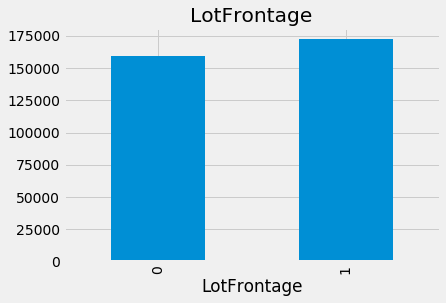

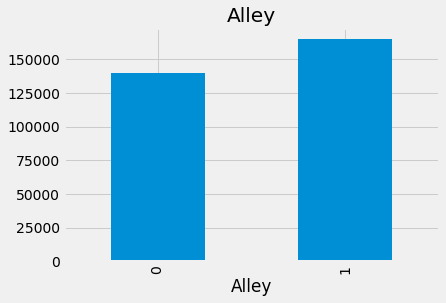

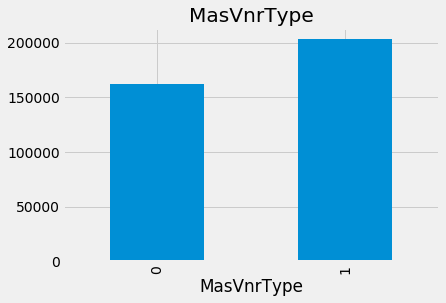

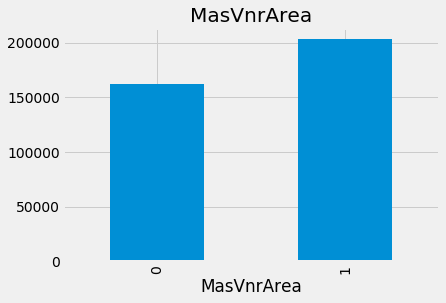

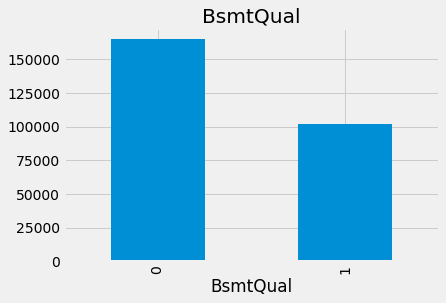

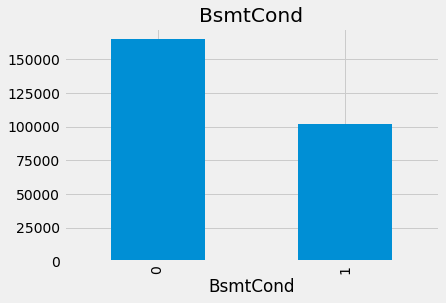

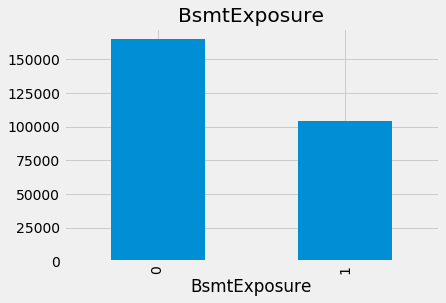

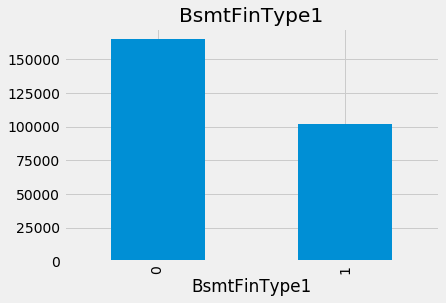

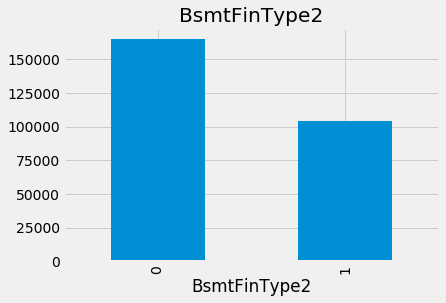

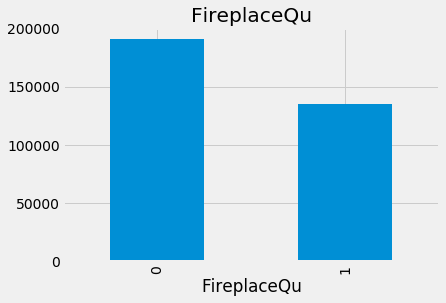

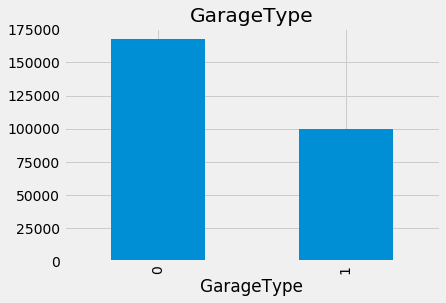

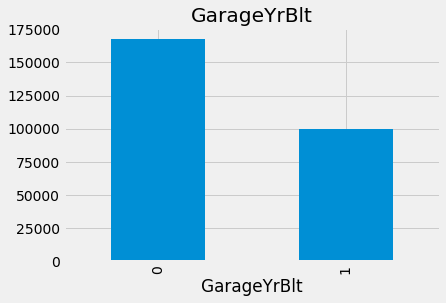

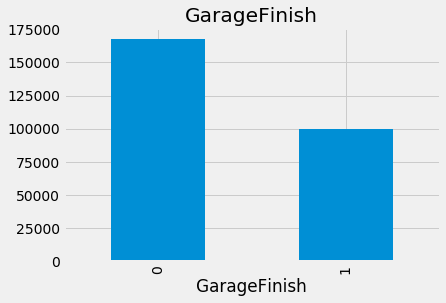

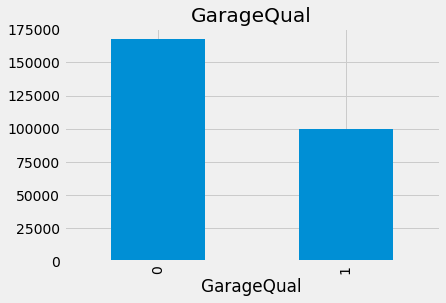

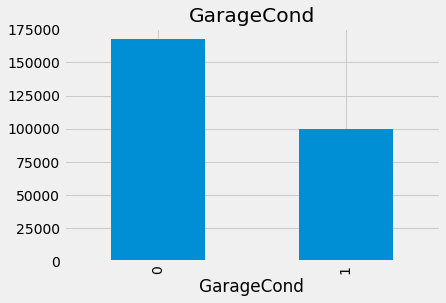

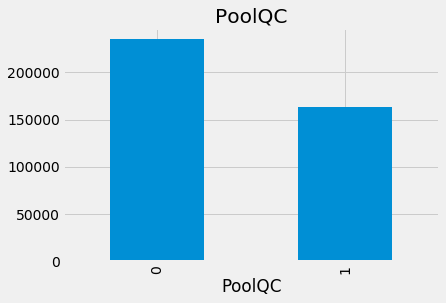

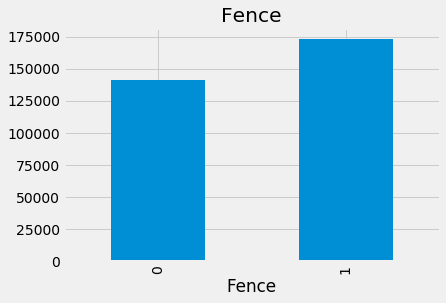

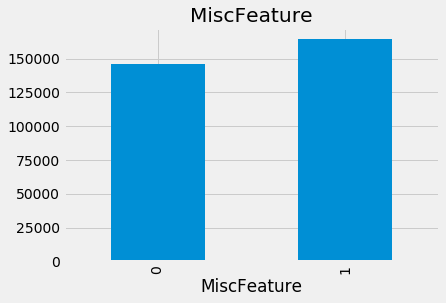

In [11]:
for feature in features_with_na:
    data = train_data.copy()

    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

# NUMERICAL VARIABLES

### * We are having different types of numerical variables
### 1. Numerical Continous Variables
### 2.Numerical Discrete Variables
### 3.Date variables

In [12]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))


train_data[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


## We are having Totally of 38 numerical Features

In [13]:
train_data.shape

(1460, 81)

In [14]:
81-38

43

## * we are having totally 43 Categorical features

### YEAR COLUMNS

In [15]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

### *Getting Unique Features of Every Year Column

In [16]:
for feature in year_feature:
    print(feature, train_data[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

### *Lets analyze the Temporal Datetime Variables
### *We will check whether there is a relation between year the house is sold and the sales price

Text(0.5, 1.0, 'House Price vs YearSold')

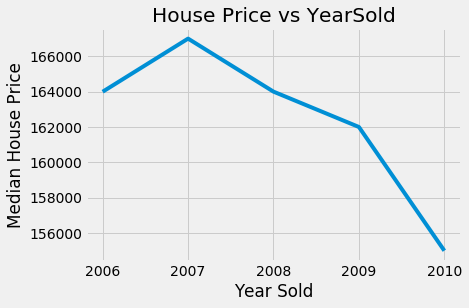

In [17]:
train_data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

## *Comapring Year Features With Sales Price

In [18]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

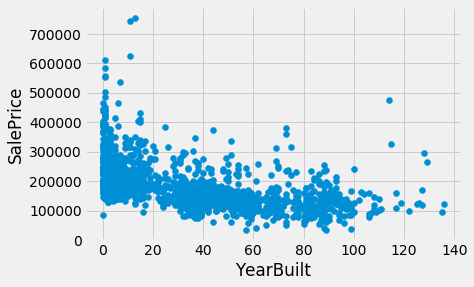

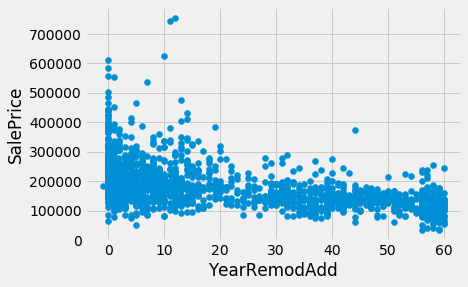

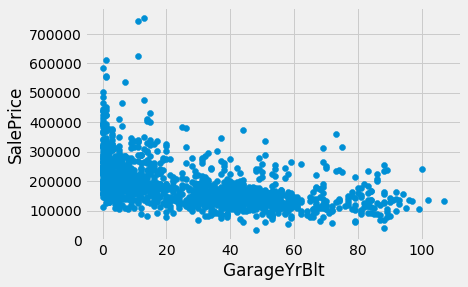

In [19]:

for feature in year_feature:
    if feature!='YrSold':
        data=train_data.copy()
        
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

## Getting Numerical Discrete Variables

In [20]:
discrete_feature=[feature for feature in numerical_features if len(train_data[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [21]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

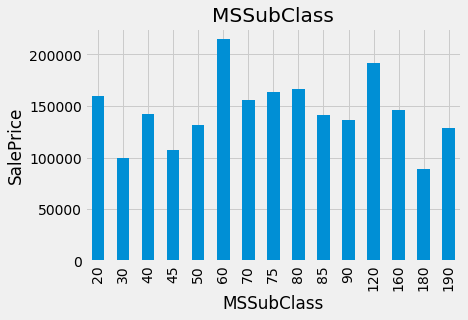

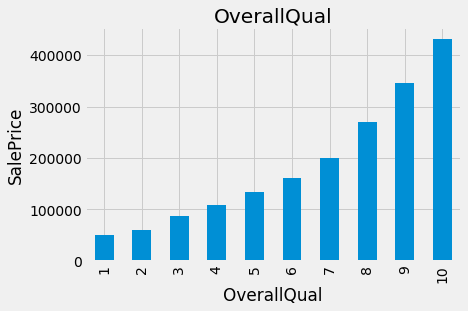

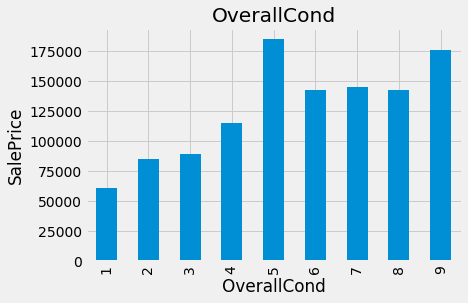

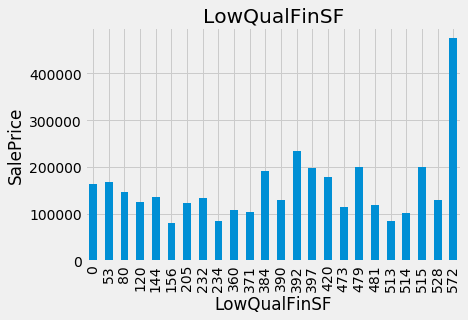

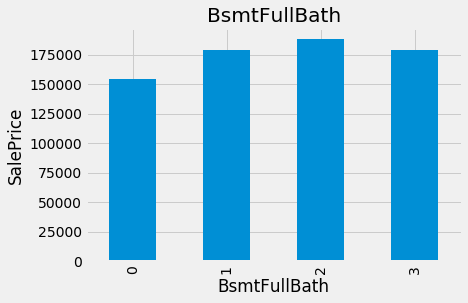

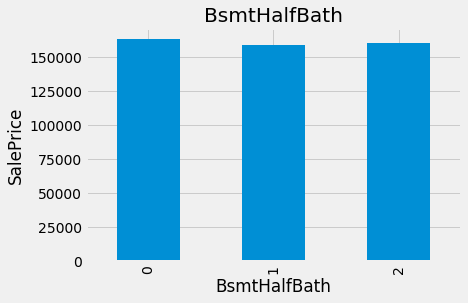

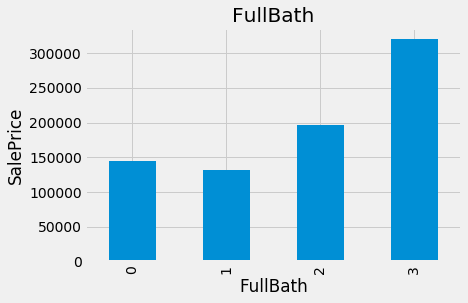

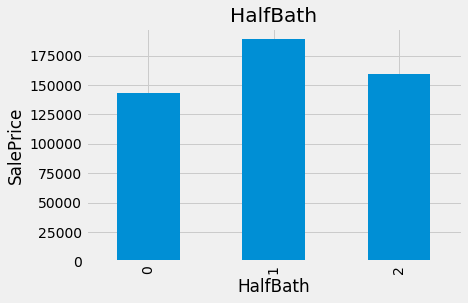

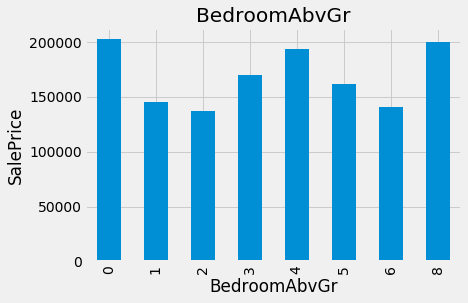

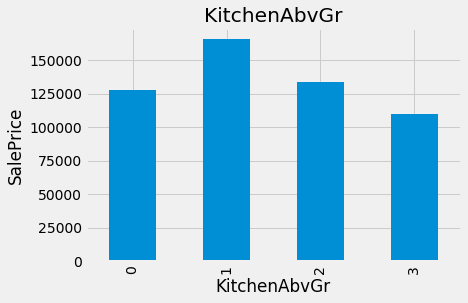

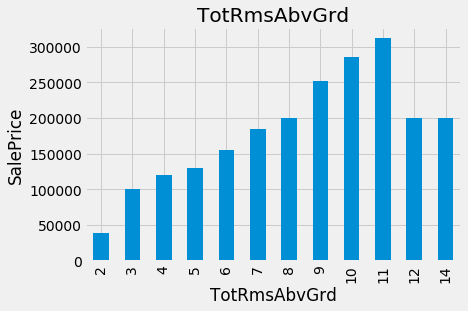

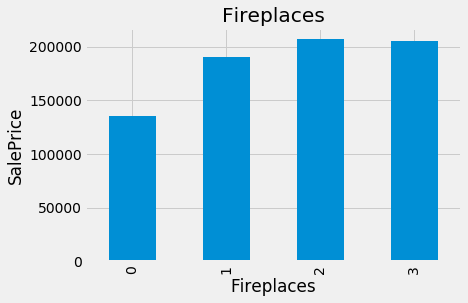

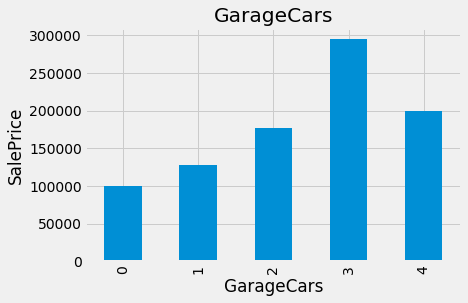

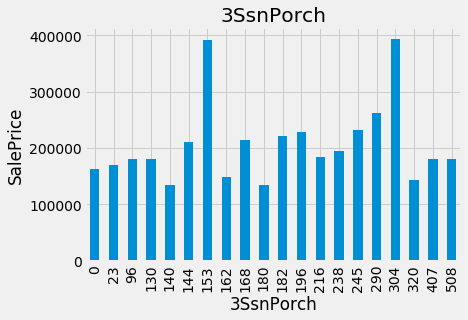

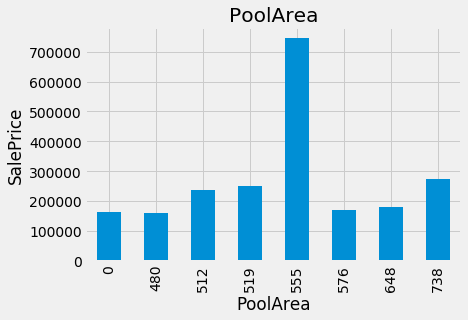

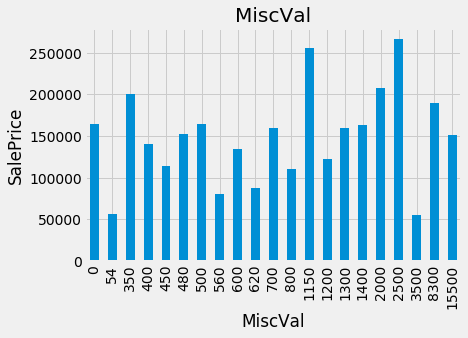

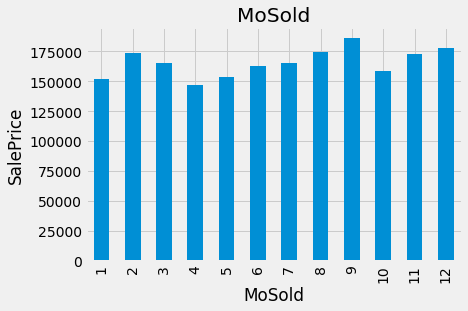

In [22]:
for feature in discrete_feature:
    data=train_data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## *Numerical Continous Variables

In [23]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


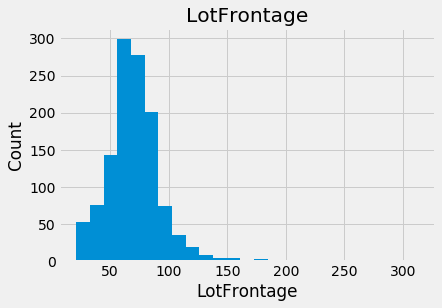

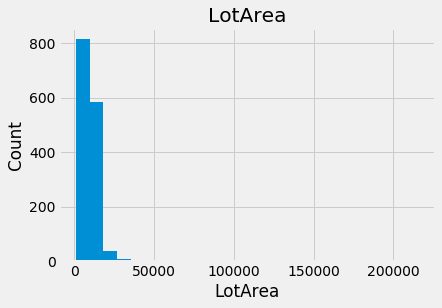

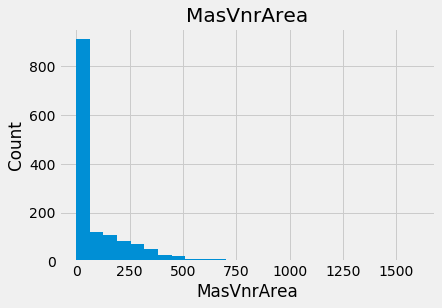

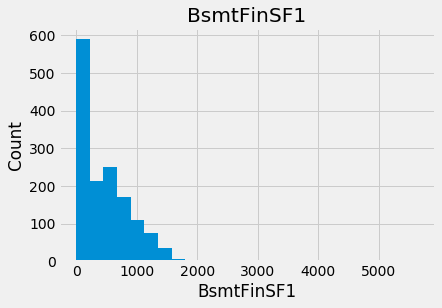

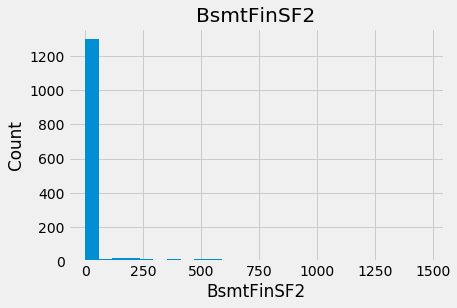

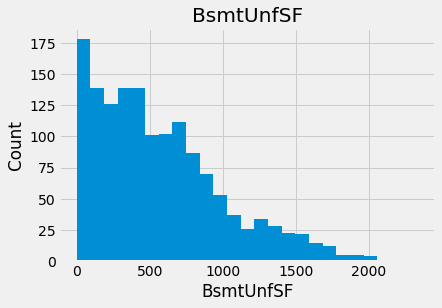

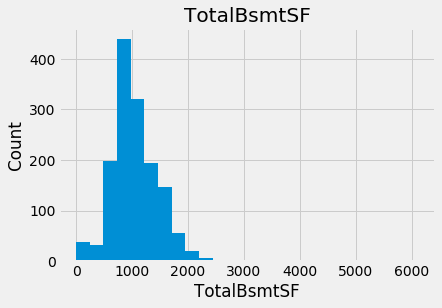

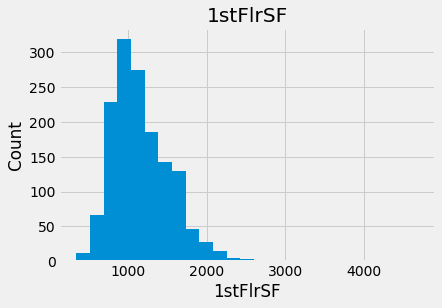

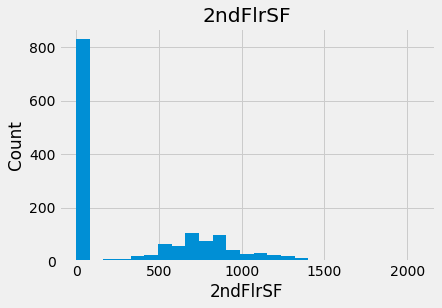

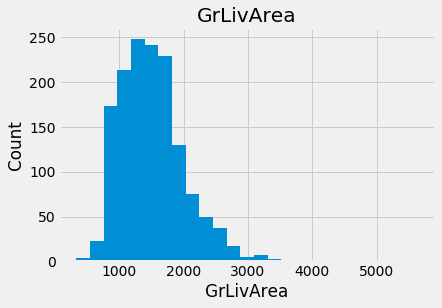

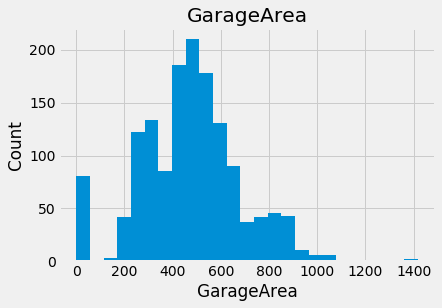

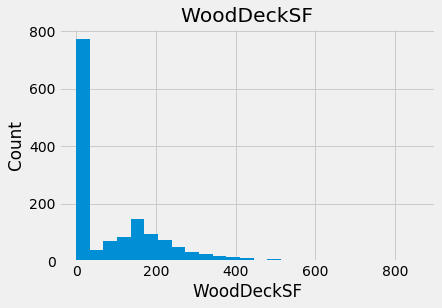

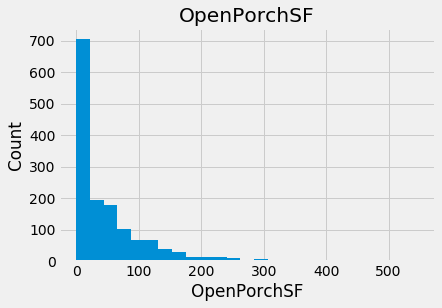

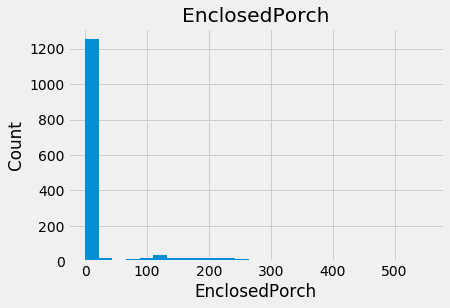

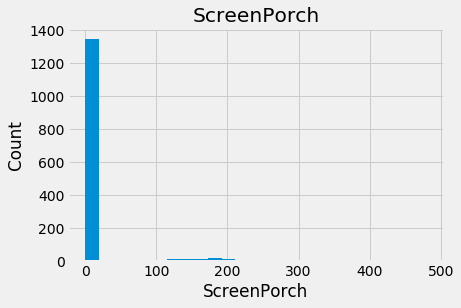

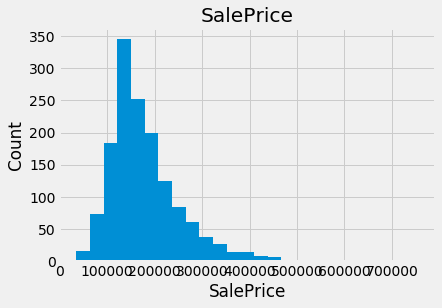

In [24]:
for feature in continuous_feature:
    data=train_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## * By applying "LOG" on Numerical Continous Features and plotthem

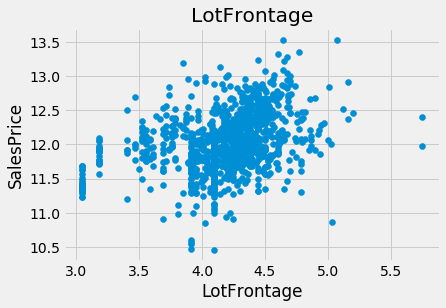

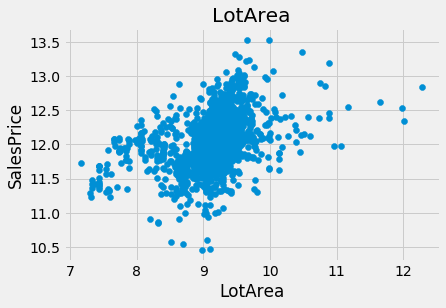

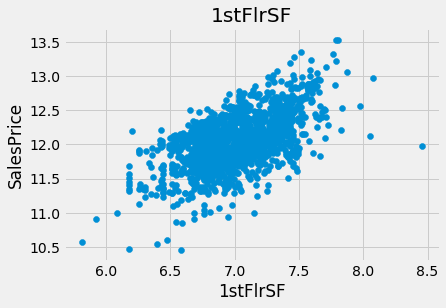

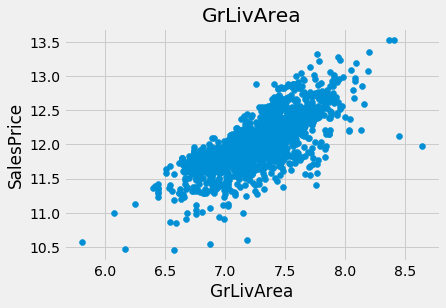

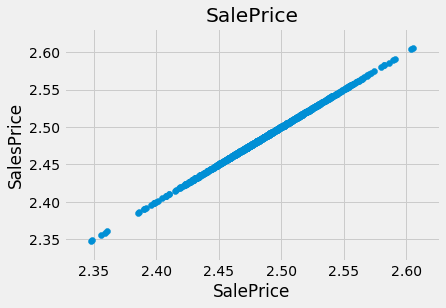

In [25]:
for feature in continuous_feature:
    data=train_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

In [26]:
len(numerical_features)

38

In [27]:
len(continuous_feature)

16

In [28]:
len(discrete_feature)

17

In [29]:
len(year_feature)

4

## *Outliers

### *Outliers can only be in Numerical Continous Features

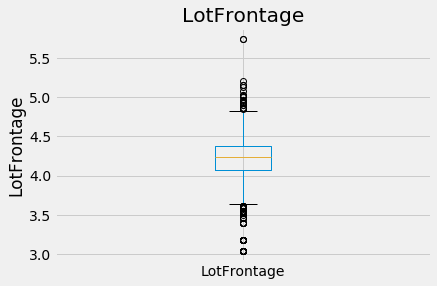

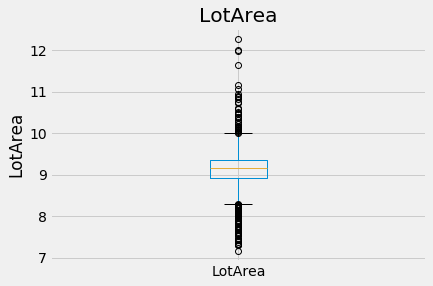

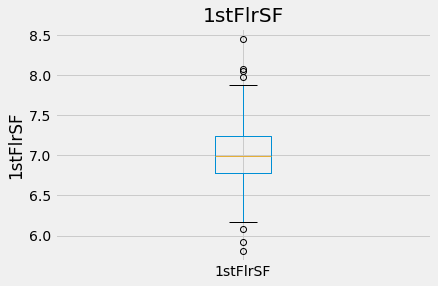

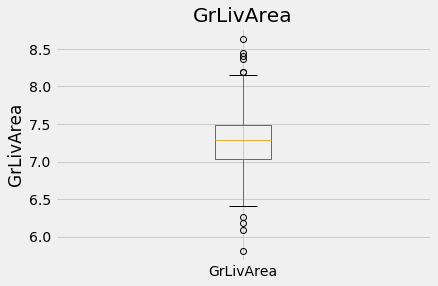

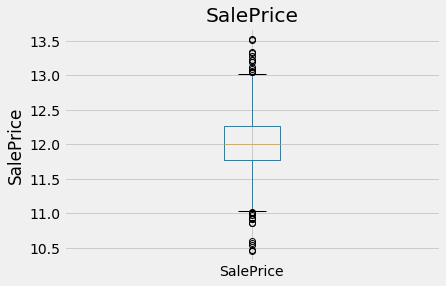

In [30]:
for feature in continuous_feature:
    data=train_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# CATEGORICAL VARIABLES

In [31]:
categorical_features=[feature for feature in train_data.columns if train_data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [32]:
len(categorical_features)

43

In [33]:
len(numerical_features)

38

In [34]:
train_data.shape

(1460, 81)

## * Finding how many unique variables in each categorical variable

In [35]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train_data[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

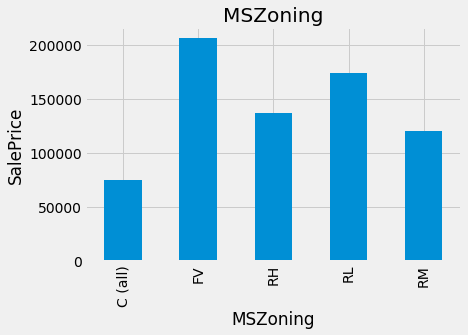

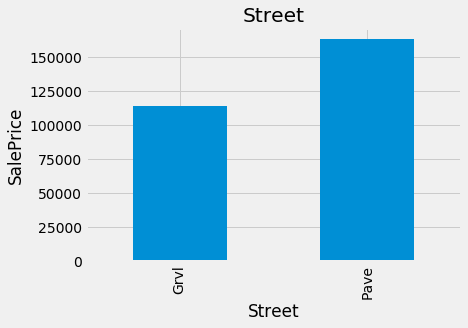

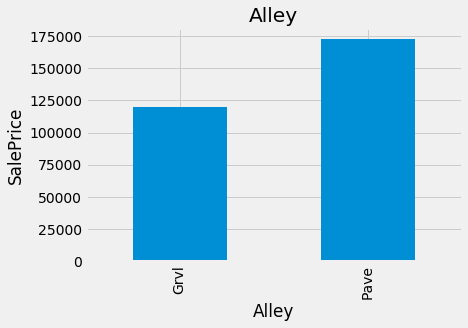

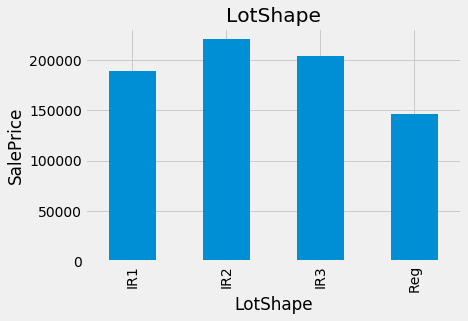

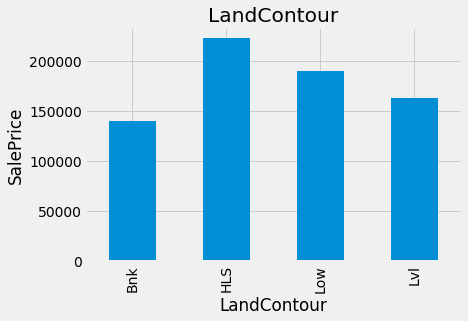

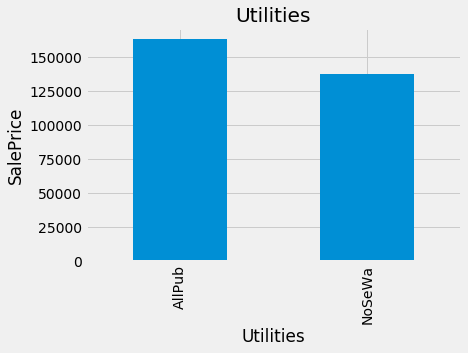

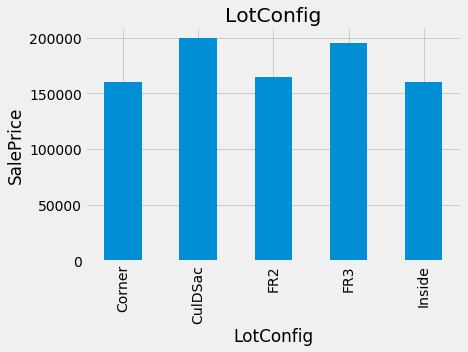

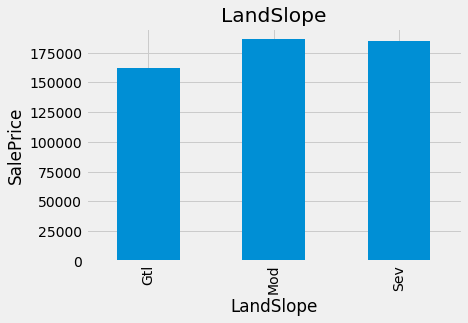

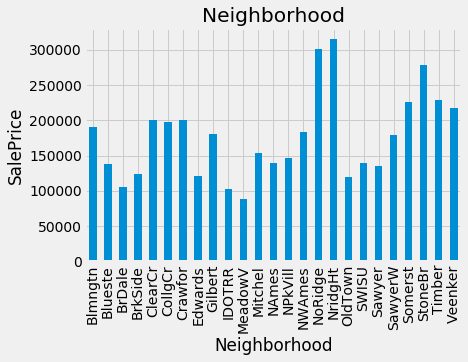

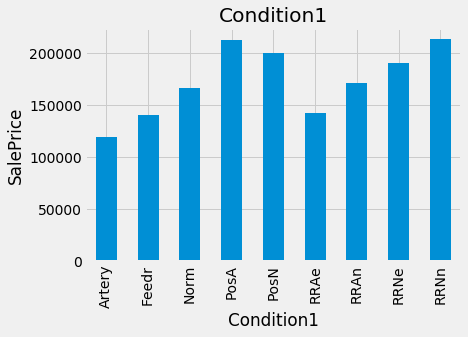

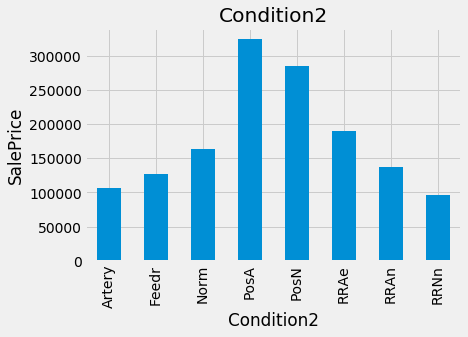

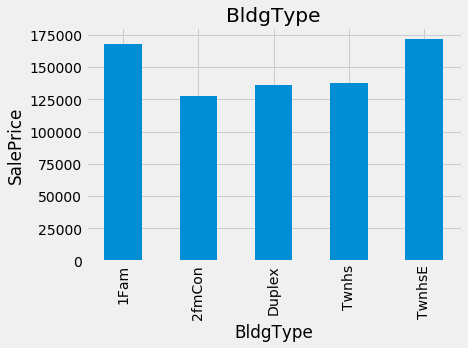

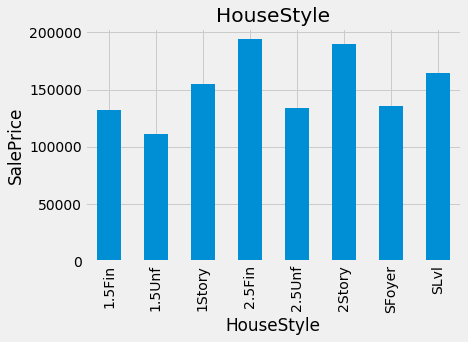

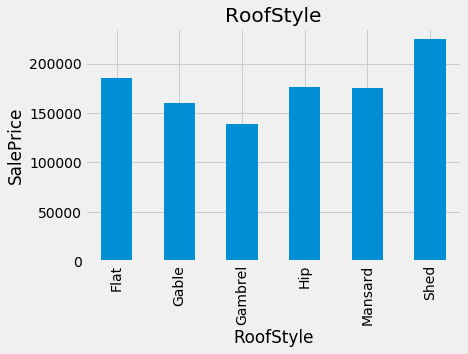

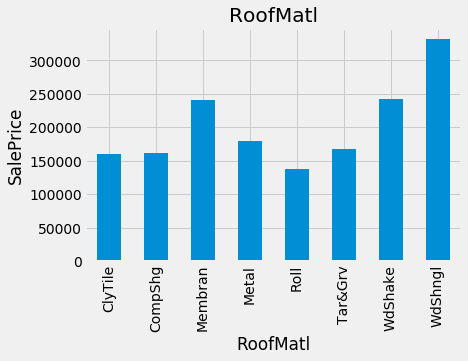

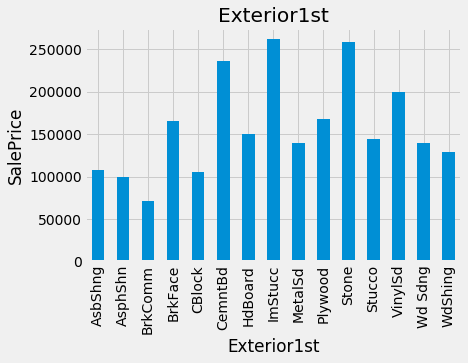

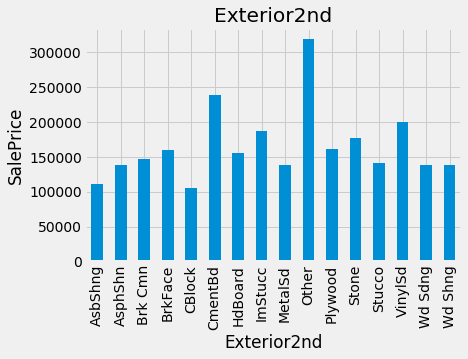

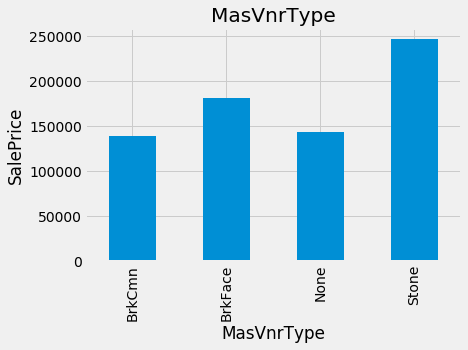

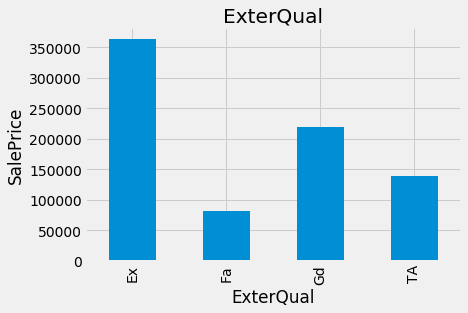

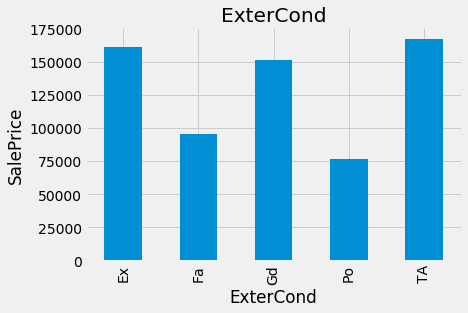

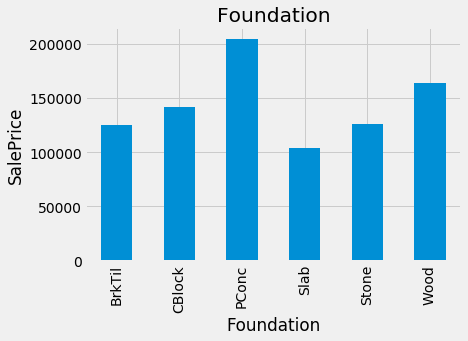

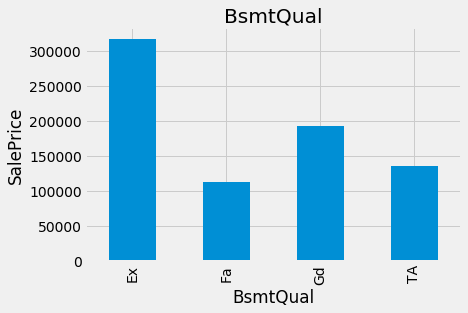

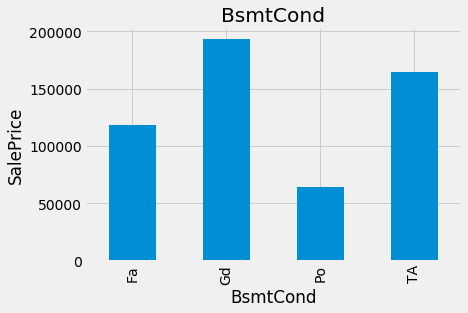

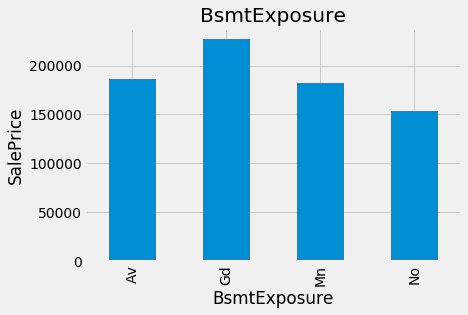

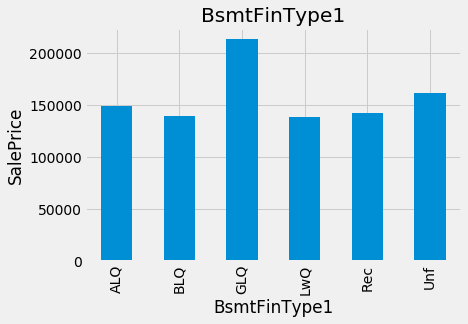

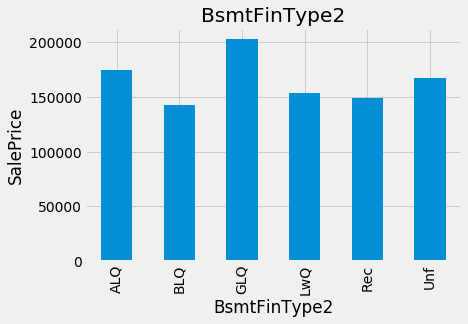

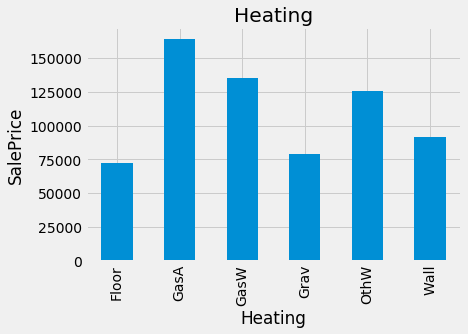

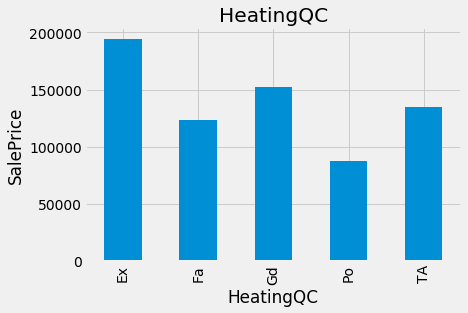

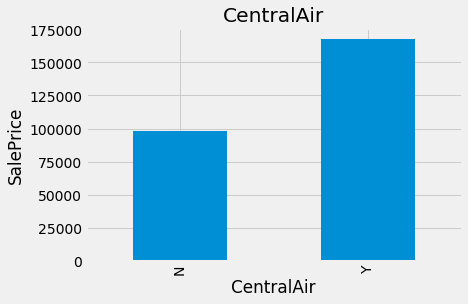

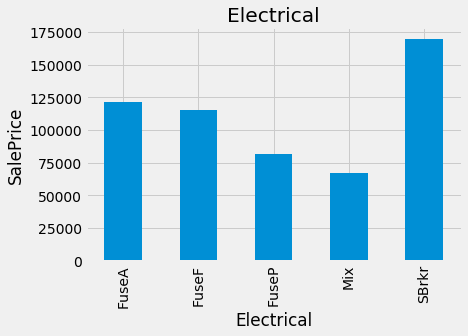

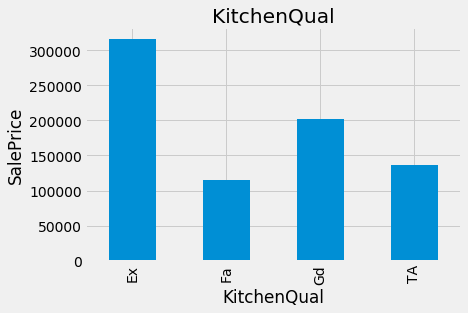

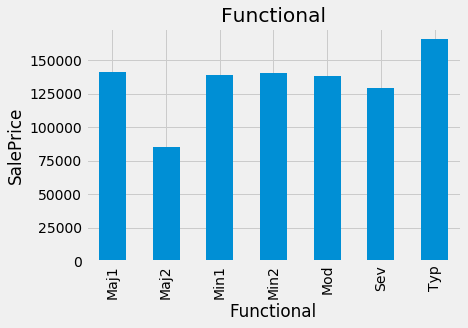

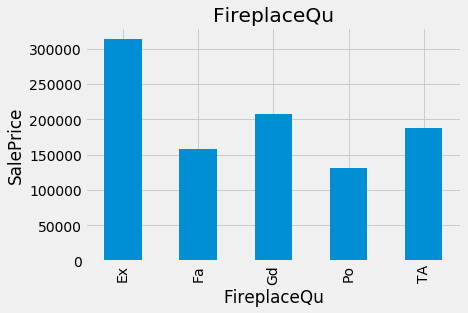

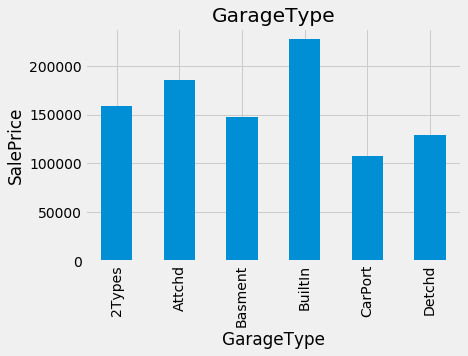

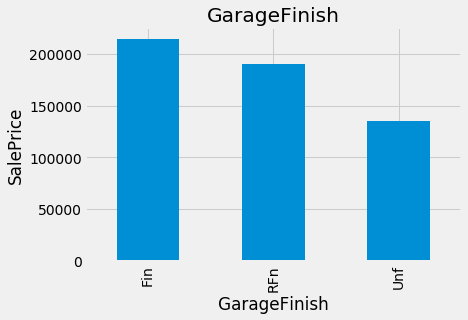

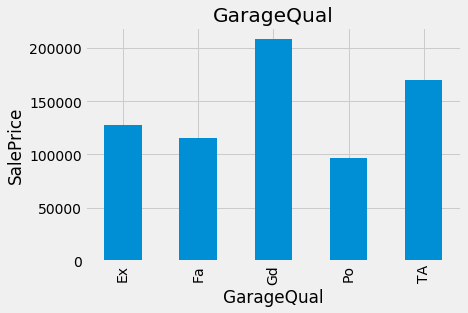

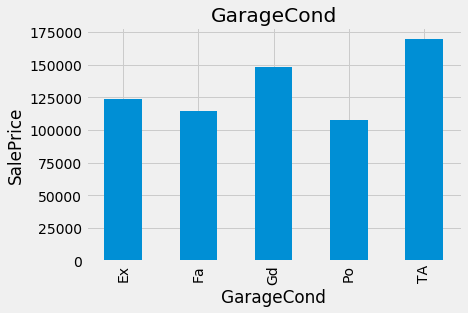

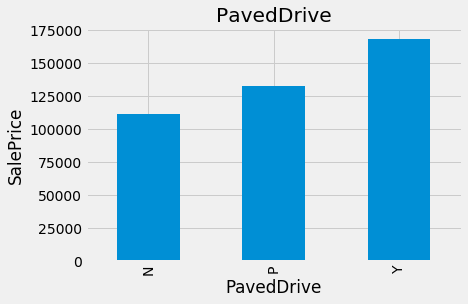

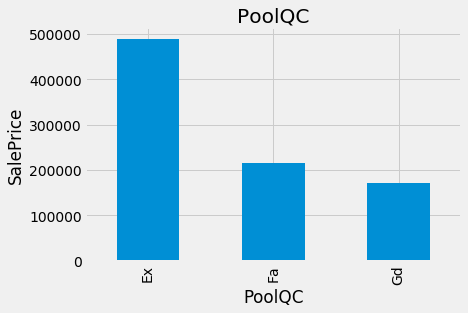

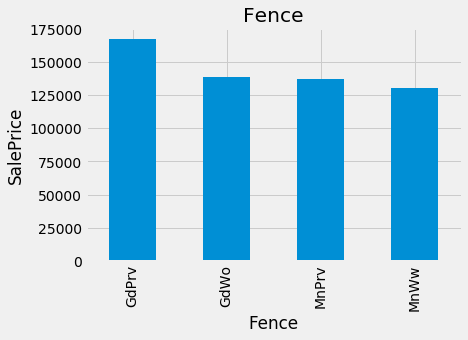

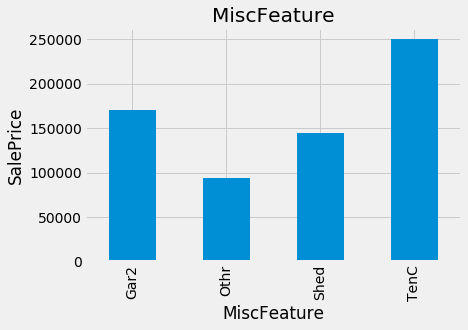

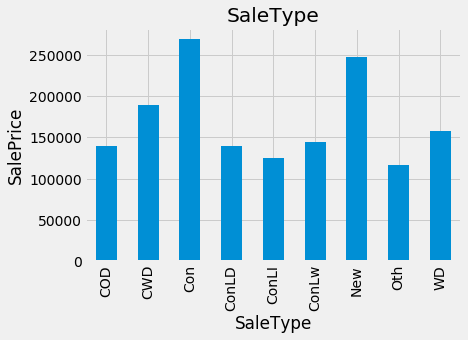

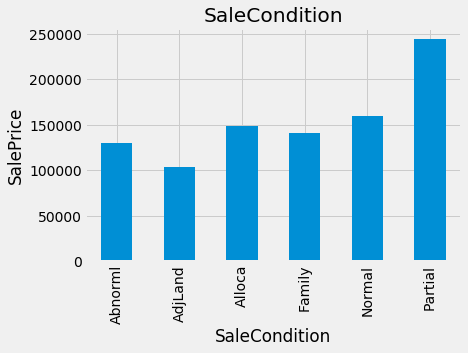

In [36]:
for feature in categorical_features:
    data=train_data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Feature Engineering

### * Missing Values

### * Missing Values for Categorical Values

In [37]:
features_nan=[feature for feature in train_data.columns if train_data[feature].isnull().sum()>1 and train_data[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(train_data[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


## * Replacing all NA values by "Missing"

In [38]:
def replace_cat_feature(train_data,features_nan):
    data=train_data.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

train_data=replace_cat_feature(train_data,features_nan)

train_data[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

## *numerical Variables Containing Missing values

In [39]:

numerical_with_nan=[feature for feature in train_data.columns if train_data[feature].isnull().sum()>1 and train_data[feature].dtypes!='O']

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(train_data[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


In [40]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=train_data[feature].median()
    
    ## create a new feature to capture nan values
    train_data[feature+'nan']=np.where(train_data[feature].isnull(),1,0)
    train_data[feature].fillna(median_value,inplace=True)
    
train_data[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [41]:
train_data.shape

(1460, 84)

In [42]:
len(numerical_features)

38

In [43]:
len(categorical_features)

43

In [44]:
categorical_features_20=[feature for feature in categorical_features if len(train_data[feature].unique())>10 and feature not in year_feature+['Id']]
print("categorical Variables Count: {}".format(len(categorical_features_20)))

categorical Variables Count: 3


In [45]:
categorical_features_20

['Neighborhood', 'Exterior1st', 'Exterior2nd']

# TEST DATA

In [46]:
test_data=pd.read_csv("test.csv")

In [47]:
test_data.shape

(1459, 80)

In [48]:
features_nan_test=[feature for feature in test_data.columns if test_data[feature].isnull().sum()>1 and test_data[feature].dtypes=='O']

for feature in features_nan_test:
    print("{}: {}% missing values".format(feature,np.round(test_data[feature].isnull().mean(),4)))

MSZoning: 0.0027% missing values
Alley: 0.9267% missing values
Utilities: 0.0014% missing values
MasVnrType: 0.011% missing values
BsmtQual: 0.0302% missing values
BsmtCond: 0.0308% missing values
BsmtExposure: 0.0302% missing values
BsmtFinType1: 0.0288% missing values
BsmtFinType2: 0.0288% missing values
Functional: 0.0014% missing values
FireplaceQu: 0.5003% missing values
GarageType: 0.0521% missing values
GarageFinish: 0.0535% missing values
GarageQual: 0.0535% missing values
GarageCond: 0.0535% missing values
PoolQC: 0.9979% missing values
Fence: 0.8012% missing values
MiscFeature: 0.965% missing values


In [49]:
def replace_cat_feature_test(test_data,features_nan_test):
    data=test_data.copy()
    data[features_nan_test]=data[features_nan_test].fillna('Missing')
    return data

test_data=replace_cat_feature_test(test_data,features_nan_test)

test_data[features_nan_test].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [50]:

numerical_with_nan_test=[feature for feature in test_data.columns if test_data[feature].isnull().sum()>1 and test_data[feature].dtypes!='O']

for feature in numerical_with_nan_test:
    print("{}: {}% missing value".format(feature,np.around(test_data[feature].isnull().mean(),4)))

LotFrontage: 0.1556% missing value
MasVnrArea: 0.0103% missing value
BsmtFullBath: 0.0014% missing value
BsmtHalfBath: 0.0014% missing value
GarageYrBlt: 0.0535% missing value


In [51]:
for feature in numerical_with_nan_test:
    ## We will replace by using median since there are outliers
    median_value=test_data[feature].median()
    
    ## create a new feature to capture nan values
    test_data[feature+'nan']=np.where(test_data[feature].isnull(),1,0)
    test_data[feature].fillna(median_value,inplace=True)
    
test_data[numerical_with_nan_test].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [52]:
train_data.shape

(1460, 84)

In [53]:
test_data.shape

(1459, 85)

In [54]:
numerical_features_test= [feature for feature in test_data.columns if test_data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features_test))

test_data[numerical_features_test].head()

Number of numerical variables:  42


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,0,0,0,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,0,0,0,0,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,0,0,0,0,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,0,0,0,0,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,0,0,0,0,0


In [55]:
year_feature_test= [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature_test

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [56]:
discrete_feature_test=[feature for feature in numerical_features_test if len(test_data[feature].unique())<25 and feature not in year_feature_test+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature_test)))

Discrete Variables Count: 21


In [57]:
continuous_feature_test=[feature for feature in numerical_features_test if feature not in discrete_feature_test+year_feature_test+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature_test)))

Continuous feature Count 16


In [58]:
categorical_features_test=[feature for feature in test_data.columns if test_data[feature].dtypes=='O']
len(categorical_features_test)

43

In [59]:
categorical_features_20_test=[feature for feature in categorical_features_test if len(test_data[feature].unique())>10 and feature not in year_feature+['Id']]
print("categorical Variables Count: {}".format(len(categorical_features_20_test)))

categorical Variables Count: 3


In [60]:
categorical_features_20_test

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [61]:
for feature in categorical_features_test:
    print('The feature is {} and number of categories are {}'.format(feature,len(test_data[feature].unique())))

The feature is MSZoning and number of categories are 6
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 5
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 7
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 4
The feature is Exterior1st and number of categories are 14
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

## RARE VARIABLE

In [62]:
for feature in categorical_features_test:
    test_data[feature] = test_data[feature].map((train_data.groupby(feature)['SalePrice'].count()/len(train_data)).to_dict())
    #train_data[feature] = train_data[feature].map((train_data.groupby(feature)['SalePrice'].count()/len(train_data)).to_dict())

In [63]:
for feature in categorical_features:
    temp=train_data.groupby(feature)['SalePrice'].count()/len(train_data)
    temp_df=temp[temp>0.01].index
    train_data[feature]=np.where(train_data[feature].isin(temp_df),train_data[feature],'Rare_var')

In [64]:
for feature in categorical_features_test:
    temp=test_data[feature]
    temp_df=temp[temp>0.01].index
    test_data[feature]=np.where(test_data[feature].isin(temp_df),test_data[feature],'Rare_var')

# TARGET ENCODING

In [65]:
for feature in categorical_features:
    labels_ordered=train_data.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train_data[feature]=train_data[feature].map(labels_ordered)

In [66]:
for feature in categorical_features_test:
    labels_ordered=test_data[feature]
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    test_data[feature]=test_data[feature].map(labels_ordered)

In [67]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,65.0,8450,1,2,0,1,1,0,0,15,4,1,4,5,7,5,2003,2003,0,0,9,9,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,856,854,0,1710,1,0,2,1,3,1,2,8,4,0,1,4,2003.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,208500,0,0,0
1,2,20,3,80.0,9600,1,2,0,1,1,1,0,12,1,1,4,4,6,8,1976,1976,0,0,1,2,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,1262,0,0,1262,0,1,2,0,3,1,1,6,4,1,3,4,1976.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,181500,0,0,0
2,3,60,3,68.0,11250,1,2,1,1,1,0,0,15,4,1,4,5,7,5,2001,2002,0,0,9,9,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,920,866,0,1786,1,0,2,1,3,1,2,6,4,1,3,4,2001.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,223500,0,0,0
3,4,70,3,60.0,9550,1,2,1,1,1,2,0,16,4,1,4,5,7,5,1915,1970,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,961,756,0,1717,1,0,1,0,3,1,2,7,4,1,4,2,1998.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,140000,0,0,0
4,5,60,3,84.0,14260,1,2,1,1,1,1,0,22,4,1,4,5,8,5,2000,2000,0,0,9,9,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,1145,1053,0,2198,1,0,2,1,4,1,2,9,4,1,3,4,2000.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,250000,0,0,0


In [68]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,1458,80.0,11622,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,5,6,1961,1961,1458,1458,1458,1458,1458,0.0,1458,1458,1458,1458,1458,1458,1458,468.0,1458,144.0,270.0,882.0,1458,1458,1458,1458,896,0,0,896,0.0,0.0,1,0,2,1,1458,5,1458,0,1458,1458,1961.0,1458,1.0,730.0,1458,1458,1458,140,0,0,0,120,0,1458,1458,1458,0,6,2010,1458,1458,0,0,0,0,0
1,1462,20,1458,81.0,14267,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,6,6,1958,1958,1458,1458,1458,1458,1458,108.0,1458,1458,1458,1458,1458,1458,1458,923.0,1458,0.0,406.0,1329.0,1458,1458,1458,1458,1329,0,0,1329,0.0,0.0,1,1,3,1,1458,6,1458,0,1458,1458,1958.0,1458,1.0,312.0,1458,1458,1458,393,36,0,0,0,0,1458,1458,1458,12500,6,2010,1458,1458,0,0,0,0,0
2,1463,60,1458,74.0,13830,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,5,5,1997,1998,1458,1458,1458,1458,1458,0.0,1458,1458,1458,1458,1458,1458,1458,791.0,1458,0.0,137.0,928.0,1458,1458,1458,1458,928,701,0,1629,0.0,0.0,2,1,3,1,1458,6,1458,1,1458,1458,1997.0,1458,2.0,482.0,1458,1458,1458,212,34,0,0,0,0,1458,1458,1458,0,3,2010,1458,1458,0,0,0,0,0
3,1464,60,1458,78.0,9978,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,6,6,1998,1998,1458,1458,1458,1458,1458,20.0,1458,1458,1458,1458,1458,1458,1458,602.0,1458,0.0,324.0,926.0,1458,1458,1458,1458,926,678,0,1604,0.0,0.0,2,1,3,1,1458,7,1458,1,1458,1458,1998.0,1458,2.0,470.0,1458,1458,1458,360,36,0,0,0,0,1458,1458,1458,0,6,2010,1458,1458,0,0,0,0,0
4,1465,120,1458,43.0,5005,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,8,5,1992,1992,1458,1458,1458,1458,1458,0.0,1458,1458,1458,1458,1458,1458,1458,263.0,1458,0.0,1017.0,1280.0,1458,1458,1458,1458,1280,0,0,1280,0.0,0.0,2,0,2,1,1458,5,1458,0,1458,1458,1992.0,1458,2.0,506.0,1458,1458,1458,0,82,0,0,144,0,1458,1458,1458,0,1,2010,1458,1458,0,0,0,0,0


## Date Varaibles

In [69]:

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    train_data[feature]=train_data['YrSold']-train_data[feature]

In [70]:

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    test_data[feature]=test_data['YrSold']-test_data[feature]

In [71]:
train_data[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [72]:
test_data[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


## Performing log normal distribution for numerical continous variables

In [73]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    train_data[feature]=np.log(train_data[feature])

In [74]:
len(continuous_feature)

16

In [75]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,15,4,1,4,5,7,5,5,5,0,0,9,9,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,1,0,12,1,1,4,4,6,8,31,31,0,0,1,2,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,15,4,1,4,5,7,5,7,6,0,0,9,9,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,2,0,16,4,1,4,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,1,0,22,4,1,4,5,8,5,8,8,0,0,9,9,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0


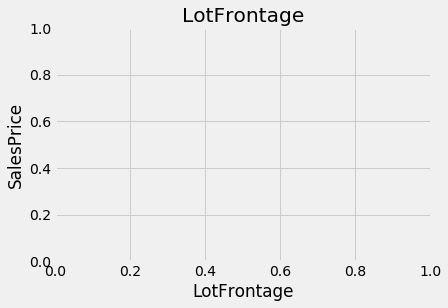

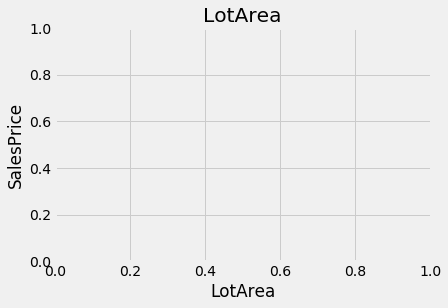

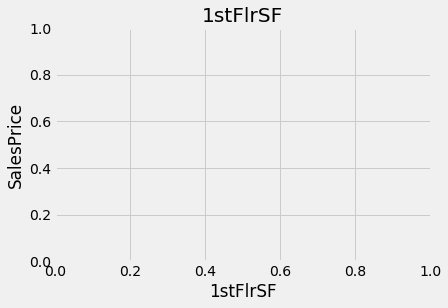

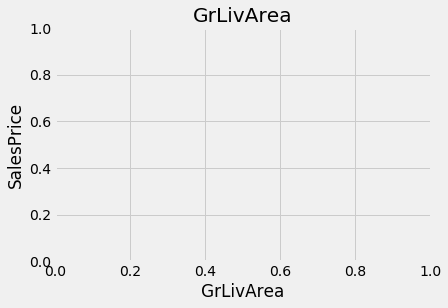

In [76]:
for feature in continuous_feature_test:
    data=test_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        #data['SalePrice']=np.log(data['SalePrice'])
        #plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

In [77]:
import numpy as np
num_features_test=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_features_test:
    test_data[feature]=np.log(test_data[feature])

In [78]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,1458,4.382027,9.360655,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,5,6,49,49,1458,1458,1458,1458,1458,0.0,1458,1458,1458,1458,1458,1458,1458,468.0,1458,144.0,270.0,882.0,1458,1458,1458,1458,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,1458,5,1458,0,1458,1458,49.0,1458,1.0,730.0,1458,1458,1458,140,0,0,0,120,0,1458,1458,1458,0,6,2010,1458,1458,0,0,0,0,0
1,1462,20,1458,4.394449,9.565704,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,6,6,52,52,1458,1458,1458,1458,1458,108.0,1458,1458,1458,1458,1458,1458,1458,923.0,1458,0.0,406.0,1329.0,1458,1458,1458,1458,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,1458,6,1458,0,1458,1458,52.0,1458,1.0,312.0,1458,1458,1458,393,36,0,0,0,0,1458,1458,1458,12500,6,2010,1458,1458,0,0,0,0,0
2,1463,60,1458,4.304065,9.534595,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,5,5,13,12,1458,1458,1458,1458,1458,0.0,1458,1458,1458,1458,1458,1458,1458,791.0,1458,0.0,137.0,928.0,1458,1458,1458,1458,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,1458,6,1458,1,1458,1458,13.0,1458,2.0,482.0,1458,1458,1458,212,34,0,0,0,0,1458,1458,1458,0,3,2010,1458,1458,0,0,0,0,0
3,1464,60,1458,4.356709,9.208138,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,6,6,12,12,1458,1458,1458,1458,1458,20.0,1458,1458,1458,1458,1458,1458,1458,602.0,1458,0.0,324.0,926.0,1458,1458,1458,1458,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,1458,7,1458,1,1458,1458,12.0,1458,2.0,470.0,1458,1458,1458,360,36,0,0,0,0,1458,1458,1458,0,6,2010,1458,1458,0,0,0,0,0
4,1465,120,1458,3.761200,8.518193,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,8,5,18,18,1458,1458,1458,1458,1458,0.0,1458,1458,1458,1458,1458,1458,1458,263.0,1458,0.0,1017.0,1280.0,1458,1458,1458,1458,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,1458,5,1458,0,1458,1458,18.0,1458,2.0,506.0,1458,1458,1458,0,82,0,0,144,0,1458,1458,1458,0,1,2010,1458,1458,0,0,0,0,0


In [79]:
train_data.shape

(1460, 84)

In [80]:
test_data.shape

(1459, 85)

# FEATURE SCALING

In [81]:
scaling_feature=[feature for feature in train_data.columns if feature not in ['id','SalePrice'] ]
len(scaling_feature)

83

In [82]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_data.loc[:,scaling_feature] = scaler.fit_transform(train_data.loc[:,scaling_feature])

In [83]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,-1.730865,0.073375,0.359044,-0.075869,-0.133231,0.064238,0.244717,-0.657040,-0.111168,0.02618,-0.561478,-0.225716,0.706356,0.336193,0.101885,0.380115,0.908299,0.651479,-0.517200,-1.043259,-0.869941,-0.52024,-0.134652,0.948992,1.037206,0.481584,0.514104,1.052302,0.365317,1.060705,0.618960,0.094944,-0.590555,1.006001,0.575425,0.335924,-0.288653,-0.944591,-0.459303,0.141339,0.891179,0.263813,0.282021,-0.803570,1.161852,-0.120242,0.529260,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.735994,0.912210,0.25278,-0.951226,-0.944190,0.586606,-1.008328,0.318475,0.311725,0.351000,0.259467,0.304008,0.289745,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.069409,0.452911,0.193668,-0.087688,-1.599111,0.138777,-0.011669,0.185280,12.247694,-0.464385,-0.074227,-0.24236
1,-1.728492,-0.872563,0.359044,0.572424,0.113442,0.064238,0.244717,-0.657040,-0.111168,0.02618,0.291548,-0.225716,0.197417,-2.644624,0.101885,0.380115,0.153107,-0.071836,2.179628,-0.183465,0.390141,-0.52024,-0.134652,-1.490319,-1.138096,-0.634468,-0.570750,-0.689604,0.365317,-0.649543,0.618960,0.094944,2.220999,-0.136559,1.171992,0.335924,-0.288653,-0.641228,0.466465,0.141339,0.891179,0.263813,0.282021,0.418585,-0.795163,-0.120242,-0.381846,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.771091,-0.318683,0.25278,0.600495,0.526229,0.586606,0.073805,0.318475,0.311725,-0.060731,0.259467,0.304008,0.289745,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.069409,0.452911,0.193668,-0.087688,-0.489110,-0.614439,-0.011669,0.185280,12.109011,-0.464385,-0.074227,-0.24236
2,-1.726120,0.073375,0.359044,0.065007,0.420061,0.064238,0.244717,0.872909,-0.111168,0.02618,-0.561478,-0.225716,0.706356,0.336193,0.101885,0.380115,0.908299,0.651479,-0.517200,-0.977121,-0.821476,-0.52024,-0.134652,0.948992,1.037206,0.481584,0.325915,1.052302,0.365317,1.060705,0.618960,0.094944,0.346630,1.006001,0.092907,0.335924,-0.288653,-0.301643,-0.313369,0.141339,0.891179,0.263813,0.282021,-0.576560,1.189351,-0.120242,0.659675,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.735994,-0.318683,0.25278,0.600495,0.526229,0.586606,-0.925087,0.318475,0.311725,0.631726,0.259467,0.304008,0.289745,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.069409,0.452911,0.193668,-0.087688,0.990891,0.138777,-0.011669,0.185280,12.317167,-0.464385,-0.074227,-0.24236
3,-1.723747,0.309859,0.359044,-0.325778,0.103347,0.064238,0.244717,0.872909,-0.111168,0.02618,1.144574,-0.225716,0.876003,0.336193,0.101885,0.380115,0.908299,0.651479,-0.517200,1.800676,0.632464,-0.52024,-0.134652,-1.185405,-0.516581,-0.634468,-0.570750,-0.689604,0.365317,-1.504667,-0.655627,2.405256,-0.590555,-0.136559,-0.499274,0.335924,-0.288653,-0.061670,-0.687324,0.141339,-0.151386,0.263813,0.282021,-0.439287,0.937276,-0.120242,0.541511,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.735994,0.296763,0.25278,0.600495,1.261438,-1.008264,-0.883467,-0.801942,1.650307,0.790804,0.259467,0.304008,0.289745,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.069409,0.452911,0.193668,-0.087688,-1.599111

In [84]:
scaling_feature_test=[feature for feature in test_data.columns if feature not in ["Id"] ]
len(scaling_feature_test)

84

In [85]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
test_data.loc[:,scaling_feature_test] = scaler.fit_transform(test_data.loc[:,scaling_feature_test])

In [86]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,-0.874711,0.0,0.622900,0.561781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.751101,0.400766,0.413784,1.178391,0.0,0.0,0.0,0.0,0.0,-0.563316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063273,0.0,0.517171,-0.650396,-0.370681,0.0,0.0,0.0,0.0,-0.612768,-0.775254,-0.080483,-1.442220,-0.818068,-0.25816,-1.028720,-0.751040,-1.029543,-0.20391,0.0,-0.918335,0.0,-0.898055,0.0,0.0,0.738617,0.0,-0.987674,1.185538,0.0,0.0,0.0,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,0.0,0.0,0.0,-0.092244,-0.038281,1.713905,0.0,0.0,-0.429247,-0.101921,-0.03705,-0.03705,-0.237657
1,1462,-0.874711,0.0,0.660198,0.970361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.054877,0.400766,0.512398,1.320405,0.0,0.0,0.0,0.0,0.0,0.047057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.063027,0.0,-0.297800,-0.339262,0.638925,0.0,0.0,0.0,0.0,0.589032,-0.775254,-0.080483,-0.194791,-0.818068,-0.25816,-1.028720,1.237648,0.175997,-0.20391,0.0,-0.255371,0.0,-0.898055,0.0,0.0,0.855119,0.0,-0.987674,-0.740959,0.0,0.0,0.0,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,0.0,0.0,0.0,19.730438,-0.038281,1.713905,0.0,0.0,-0.429247,-0.101921,-0.03705,-0.03705,-0.237657
2,1463,0.061351,0.0,0.388823,0.908374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.751101,-0.497418,-0.769577,-0.573119,0.0,0.0,0.0,0.0,0.0,-0.563316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.772989,0.0,-0.297800,-0.954667,-0.266785,0.0,0.0,0.0,0.0,-0.505796,0.891944,-0.080483,0.449232,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,0.0,-0.255371,0.0,0.647066,0.0,0.0,-0.659405,0.0,0.301519,0.042545,0.0,0.0,0.0,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,0.0,0.0,0.0,-0.092244,-1.140614,1.713905,0.0,0.0,-0.429247,-0.101921,-0.03705,-0.03705,-0.237657
3,1464,0.061351,0.0,0.546884,0.257876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.054877,0.400766,-0.802448,-0.573119,0.0,0.0,0.0,0.0,0.0,-0.450284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357706,0.0,-0.297800,-0.526857,-0.271302,0.0,0.0,0.0,0.0,-0.512373,0.837243,-0.080483,0.400297,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,0.0,0.407593,0.0,0.647066,0.0,0.0,-0.698239,0.0,0.301519,-0.012761,0.0,0.0,0.0,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,0.0,0.0,0.0,-0.092244,-0.038281,1.713905,0.0,0.0,-0.429247,-0.101921,-0.03705,-0.03705,-0.237657
4,1465,1.465443,0.0,-1.241112,-1.116906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.337571,-0.497418,-0.605221,-0.289090,0.0,0.0,0.0,0.0,0.0,-0.563316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.387166,0.0,-0.297800,1.058554,0.528252,0.0,0.0,0.0,0.0,0.474514,-0.775254,-0.080483,-0.313657,-0.818068,-0.25816,0.773083,-0.751040,-1.029543,-0.20391,0.0,-0.918335,0.0,-0.898055,0.0,0.0,-0.465235,0.0,0.301519,0.153157,0.0,0.0,0.0,-0.729632,0.489198,-0.360738,-0.088827,2.243060,-0.057227,0.0,0.0,0.0,-0.092244,-1.875504,1.713905,0.0,0.0,-0.429247,-0.101921,-0.03705,-0.03705,-0.237657


In [87]:
test_data.to_csv("test_data123.csv")

# FEATURE SELECTION

In [88]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [89]:
train_data.drop("Id",axis=1,inplace=True)

In [90]:
train_data_new=train_data.drop(['SalePrice'],axis=1)

In [91]:
y_train=train_data[['SalePrice']]

In [92]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(train_data_new, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [93]:
selected_feat = train_data_new.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((train_data_new.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 82
selected features: 47
features with coefficients shrank to zero: 35


In [94]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LandContour',
       'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'GarageQual', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'PoolQC',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [95]:
train_data_new=train_data_new[selected_feat]

In [96]:
y_train.shape

(1460, 1)

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
xtrain,xtest,ytrain,ytest=train_test_split(train_data_new,y_train,test_size=0.3,random_state=123)

In [99]:
test_data_new=pd.read_csv("test_data123.csv",usecols=['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LandContour',
       'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofMatl',
       'Exterior1st', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'GarageQual', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'PoolQC',
       'SaleCondition'])

In [100]:
test_data_new.head()

,MSSubClass,MSZoning,LotArea,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,ScreenPorch,PoolQC,SaleCondition
0,-0.874711,0.0,0.561781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.751101,0.400766,0.413784,1.178391,0.0,0.0,-0.563316,0.0,0.0,0.0,0.0,0.0,0.0,0.063273,0.517171,0.0,0.0,-0.612768,-1.442220,-0.818068,-1.028720,-0.751040,-0.20391,0.0,-0.918335,0.0,-0.898055,0.0,0.0,-0.987674,0.0,0.0,0.366678,1.818960,0.0,0.0
1,-0.874711,0.0,0.970361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.054877,0.400766,0.512398,1.320405,0.0,0.0,0.047057,0.0,0.0,0.0,0.0,0.0,0.0,1.063027,-0.297800,0.0,0.0,0.589032,-0.194791,-0.818068,-1.028720,1.237648,-0.20391,0.0,-0.255371,0.0,-0.898055,0.0,0.0,-0.987674,0.0,0.0,2.347867,-0.301543,0.0,0.0
2,0.061351,0.0,0.908374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.751101,-0.497418,-0.769577,-0.573119,0.0,0.0,-0.563316,0.0,0.0,0.0,0.0,0.0,0.0,0.772989,-0.297800,0.0,0.0,-0.505796,0.449232,-0.818068,0.773083,1.237648,-0.20391,0.0,-0.255371,0.0,0.647066,0.0,0.0,0.301519,0.0,0.0,0.930495,-0.301543,0.0,0.0
3,0.061351,0.0,0.257876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.054877,0.400766,-0.802448,-0.573119,0.0,0.0,-0.450284,0.0,0.0,0.0,0.0,0.0,0.0,0.357706,-0.297800,0.0,0.0,-0.512373,0.400297,-0.818068,0.773083,1.237648,-0.20391,0.0,0.407593,0.0,0.647066,0.0,0.0,0.301519,0.0,0.0,2.089451,-0.301543,0.0,0.0
4,1.465443,0.0,-1.116906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.337571,-0.497418,-0.605221,-0.289090,0.0,0.0,-0.563316,0.0,0.0,0.0,0.0,0.0,0.0,-0.387166,-0.297800,0.0,0.0,0.474514,-0.313657,-0.818068,0.773083,-0.751040,-0.20391,0.0,-0.918335,0.0,-0.898055,0.0,0.0,0.301519,0.0,0.0,-0.729632,2.243060,0.0,0.0


In [101]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1022, 47), (438, 47), (1022, 1), (438, 1))

In [102]:
xtrain.columns.difference(test_data_new.columns) #we must remove these columns

Index(['Alley', 'SaleType'], dtype='object')

In [103]:
cols = ['Alley', 'SaleType']
for col in cols:
  test_data_new[col]=0

In [104]:
test_data_new.columns.difference(xtrain.columns)

Index(['RoofMatl'], dtype='object')

In [105]:
test_data_new.columns.difference(xtest.columns)

Index(['RoofMatl'], dtype='object')

In [106]:
for data in [xtrain,xtest]:
  data['RoofMatl']=0

In [107]:
ytrain=np.array(ytrain)
ytest = np.array(ytest)

In [108]:
def model_builder(model):
    m = model 
    m.fit(xtrain,np.log(ytrain)) # log(y) follows normal distribution
    train_pred =np.exp(m.predict(xtrain))
    test_pred = np.exp(m.predict(xtest))
    print('========Train=======')
    print('RMSE :' ,np.sqrt(mean_squared_error(ytrain,train_pred)))
    print('MAPE :' , np.mean(np.abs((ytrain-train_pred)/ytrain))*100)
    print('========Test=======')
    print('RMSE :' ,np.sqrt(mean_squared_error(ytest,test_pred)))
    print('MAPE :' , np.mean(np.abs((ytest-test_pred)/ytest))*100)
    return m

In [109]:
lr=model_builder(LinearRegression())

========Train=======
RMSE : 0.12416645231402951
MAPE : 0.7010142408961816
========Test=======
RMSE : 0.11117303139119838
MAPE : 0.6586575476650934


In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor

In [111]:

from sklearn.ensemble import RandomForestRegressor

In [112]:
import warnings
warnings.filterwarnings('ignore')
params = { "max_depth":[3,5] , "n_estimators":range(50,100,50)}
xg123= model_builder(GridSearchCV(XGBRegressor() ,param_grid=params , cv=3 , n_jobs=-1))

========Train=======
RMSE : 0.08167604711485889
MAPE : 3.6935582015600383
========Test=======
RMSE : 0.12103985961461429
MAPE : 3.4257576439872333


In [113]:
rf1= model_builder(RandomForestRegressor())

========Train=======
RMSE : 0.05427336097211806
MAPE : 3.66443840549718
========Test=======
RMSE : 0.12750498752142558
MAPE : 3.3793238643433336


In [122]:
params = {'n_estimators':range(50,200,50),'max_depth': range(1,10) }
rf123 = model_builder(GridSearchCV(RandomForestRegressor() , param_grid = params , cv=5 , n_jobs=-1))

========Train=======
RMSE : 0.06650502006650282
MAPE : 3.6412936849268696
========Test=======
RMSE : 0.12633647454531968
MAPE : 3.363761937705835


In [114]:
xg = model_builder(XGBRegressor())

========Train=======
RMSE : 0.013133300069548956
MAPE : 3.7408381970635283
========Test=======
RMSE : 0.12736044904578886
MAPE : 3.44182245022329


In [126]:
params ={'max_depth':range(1,15), 'min_samples_split':range(10,70,10)}
 
dt = model_builder(GridSearchCV(DecisionTreeRegressor( ) , param_grid=params , cv=5 , n_jobs=-1))

========Train=======
RMSE : 0.1315295507376673
MAPE : 3.6720087019886
========Test=======
RMSE : 0.18630955999701948
MAPE : 3.504737345977902


In [127]:
params = {'n_estimators':range(50,200,50),'learning_rate':[0.5,0.7,1.0]}
ad = model_builder(GridSearchCV(AdaBoostRegressor() , param_grid=params , cv=5 ,n_jobs=-1))

========Train=======
RMSE : 0.151752608816812
MAPE : 3.7785713572420736
========Test=======
RMSE : 0.16812969504355774
MAPE : 3.6296923831812427


In [128]:
gb = model_builder(GradientBoostingRegressor(n_estimators=50 , learning_rate=0.1))

========Train=======
RMSE : 0.09825265472434268
MAPE : 3.616122827350722
========Test=======
RMSE : 0.12028166933074849
MAPE : 3.3663049091792097


In [131]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [130]:
clf=model_builder(Ridge())

========Train=======
RMSE : 0.1241668058703227
MAPE : 0.7009597536303086
========Test=======
RMSE : 0.11109856270413182
MAPE : 0.6580838330283367


In [132]:
clf2=model_builder(Lasso())

========Train=======
RMSE : 0.40684474648742647
MAPE : 2.6129572262184784
========Test=======
RMSE : 0.3821818122439986
MAPE : 2.4702880382379995


In [115]:
test_data_new.fillna(0,inplace=True)

In [116]:
sub=pd.read_csv("sample_submission.csv")

In [117]:
sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [123]:
test_prediction = np.exp(rf123.predict(test_data_new))

In [124]:
sub['SalePrice']=test_prediction

In [125]:
sub.to_csv('final_submission_rf123.csv',index=False)